# Thomson Sampling Algorithm

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing the Thompson Sampling Algorithm

In [3]:
import random
N = 10000
d = 10
ads_selected = []
num_rewards_1=[0]*d # Number of times each ads got reward 1
num_rewards_0 = [0]*d # Number of times each ads got reward 0
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(num_rewards_1[i] + 1, num_rewards_0[i] + 1)

        if random_beta > max_random:
            max_random = random_beta
            ad = i
        
    reward = dataset.values[n, ad]
    
    if reward:
        num_rewards_1[ad] += 1
    else:
        num_rewards_0[ad] += 1
        
    ads_selected.append(ad)
    total_reward += reward

## Visualizing the results

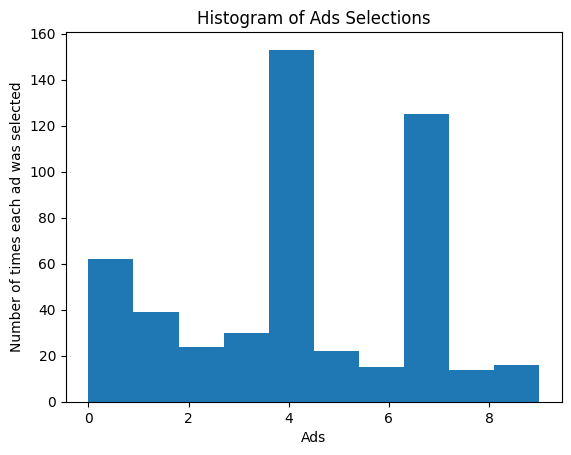

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()